Steps to Apply ARIMA in Real-World Scenarios:

*   Data Collection: Gather historical stock price data (e.g., daily closing prices).
*   Data Preprocessing: Ensure the data is cleaned and prepared for modeling (e.g., handling missing values).
*   Stationarity Check: Use tests like the Augmented Dickey-Fuller (ADF) test to check if the data is stationary. If not, use differencing to make it stationary.
*   Model Selection: Use ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots to determine the parameters (p, d, q) of the ARIMA model.
*   Fit the ARIMA Model: Use the chosen parameters to fit the ARIMA model to your time series data.
*   Forecasting: Once the model is fitted, use it to forecast future values.
*   Model Evaluation: Evaluate the forecast's accuracy using metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).








- Step-by-Step Process

1. Collect the Data: We can use libraries like yfinance to fetch real-time stock data. Here's how you can get stock price data for a company (e.g., Apple - AAPL):

[*********************100%***********************]  1 of 1 completed


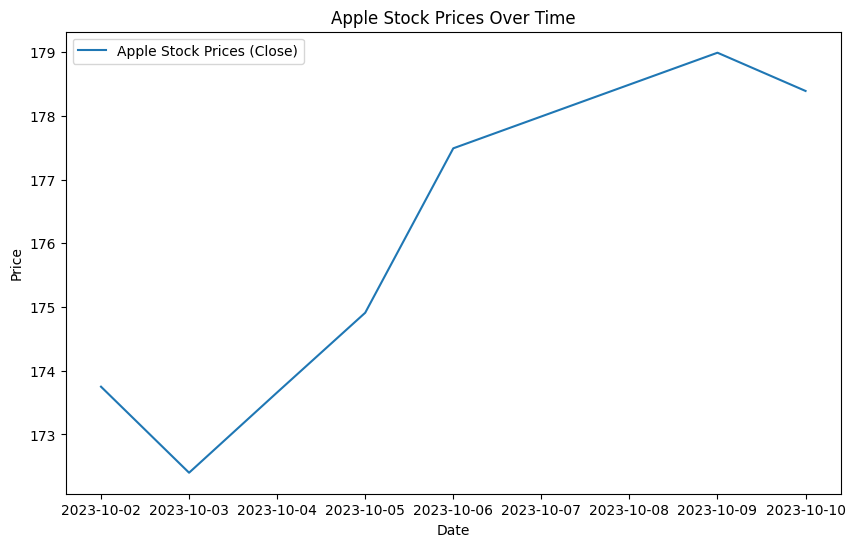

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,171.220001,174.300003,170.929993,173.750000,172.865433,52164500
2023-10-03,172.259995,173.630005,170.820007,172.399994,171.522308,49594600
2023-10-04,171.089996,174.210007,170.970001,173.660004,172.775894,53020300
2023-10-05,173.789993,175.449997,172.679993,174.910004,174.019531,48527900
2023-10-06,173.800003,177.990005,173.179993,177.490005,176.586395,57224100
2023-10-09,176.809998,179.050003,175.800003,178.990005,178.078766,42390800
2023-10-10,178.100006,179.720001,177.949997,178.389999,177.481812,43698000


In [42]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical stock price data (e.g., for Apple)
ticker = 'AAPL'
#data = yf.download(ticker, start='2015-01-01', end='2023-10-01')
data = yf.download(ticker, start='2023-10-01', end='2023-10-11')

# We'll focus on the 'Close' price for this example
stock_prices = data['Close']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Apple Stock Prices (Close)')
plt.title('Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

data
# type(data)
# data['Close'].tolist()


2. Check for Stationarity: The ARIMA model assumes that the time series is stationary (i.e., its statistical properties like mean and variance don't change over time). We can use the ADF test to check for stationarity and apply differencing if necessary.

In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test to check stationarity
result = adfuller(stock_prices)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("The series is not stationary, applying differencing...")
    stock_prices_diff = stock_prices.diff().dropna()  # Apply first-order differencing
else:
    print("The series is stationary.")


ADF Statistic: -0.20035612084451776
p-value: 0.9384791554603525
The series is not stationary, applying differencing...


3. ACF and PACF Plots: After differencing, we check the ACF and PACF plots to help select the p and q parameters for ARIMA. These plots help determine the number of autoregressive (p) and moving average (q) terms.

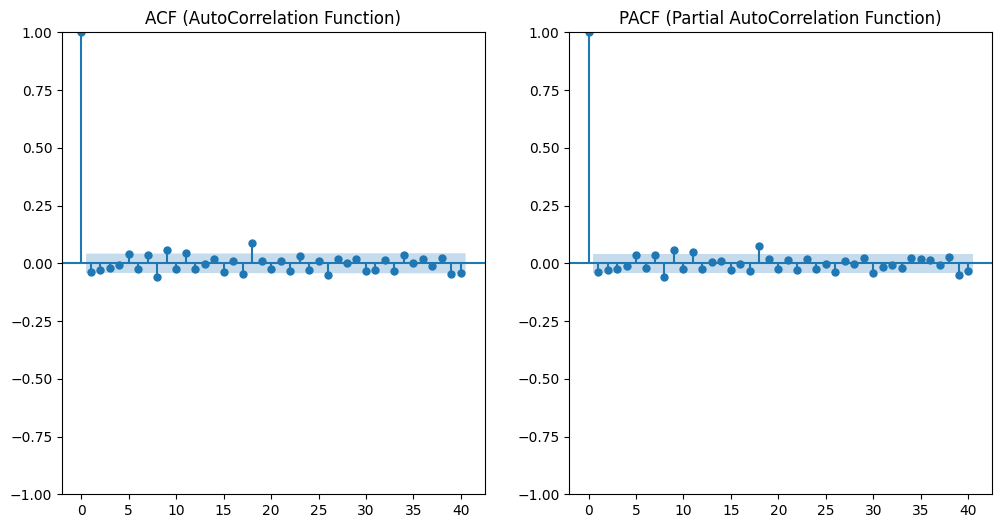

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# A lag refers to the time difference between a particular observation and a prior observation in the dataset.
# Interms of ACF - Lag is the number of time steps backward from the current point for which we are calculating the correlation.
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(stock_prices_diff, lags=40, ax=plt.gca())
plt.title('ACF (AutoCorrelation Function)')
plt.subplot(122)
plot_pacf(stock_prices_diff, lags=40, ax=plt.gca())
plt.title('PACF (Partial AutoCorrelation Function)')
plt.show()


4. Fit the ARIMA Model: Based on the ACF and PACF plots, we select values for p and q. We assume (p=1, d=1, q=1) as a starting point. We fit the ARIMA model to the differenced data.

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (e.g., ARIMA(1, 1, 1))
model = ARIMA(stock_prices, order=(1, 1, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2201
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4443.467
Date:                Wed, 09 Oct 2024   AIC                           8892.933
Time:                        02:40:16   BIC                           8910.022
Sample:                             0   HQIC                          8899.178
                               - 2201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4693      0.203      2.317      0.021       0.072       0.866
ma.L1         -0.5124      0.199     -2.580      0.010      -0.902      -0.123
sigma2         3.3254      0.050     66.585      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


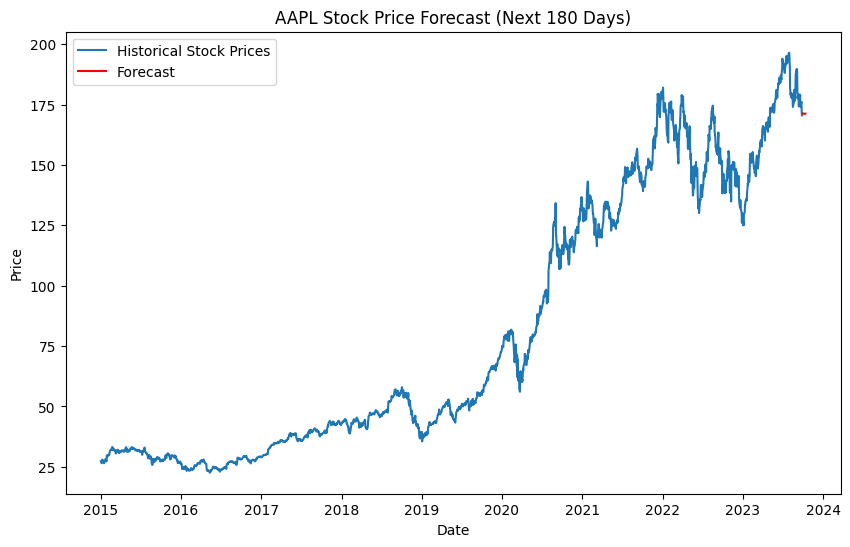

In [30]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Historical Stock Prices')
plt.plot(pd.date_range(start=stock_prices.index[-1], periods=11, freq='B')[1:], forecast, label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast (Next 180 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume you have a test set with actual stock prices
test_set = [173.75, 172.399,173.660, 174.9100, 177.490, 178.990, 178.389, 177.490, 178.490, 177.490 ]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_set, forecast))
print(f'RMSE: {rmse:.2f}')


RMSE: 5.56


In [46]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_bike_rentals_dataset.csv to synthetic_bike_rentals_dataset (1).csv


In [48]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['synthetic_bike_rentals_dataset (1).csv']))
df

,date_time,temperature,humidity,wind_speed,holiday,working_day,weather_condition,rentals
0,2023-01-01 00:00:00,16.236204,41.107976,7.851171,0,1,Clear,362
1,2023-01-01 01:00:00,33.521429,62.514057,7.409364,0,1,Clear,592
2,2023-01-01 02:00:00,26.959818,82.376750,27.187637,0,1,Cloudy,325
3,2023-01-01 03:00:00,22.959755,73.933493,7.486386,0,0,Clear,300
4,2023-01-01 04:00:00,9.680559,78.393669,8.158492,0,0,Cloudy,0
...,...,...,...,...,...,...,...,...
995,2023-02-11 11:00:00,7.747462,69.417309,25.958873,0,1,Cloudy,80
996,2023-02-11 12:00:00,32.519407,87.396877,4.718196,0,0,Clear,343
997,2023-02-11 13:00:00,9.104559,34.137481,9.293636,0,1,Cloudy,335
998,2023-02-11 14:00:00,33.507121,33.423283,8.701366,0,1,Clear,702
